# Crime Analysis and Prediction Model


Dependencies and Runtime Environment

In [1]:
!pip install pandas matplotlib seaborn geopandas


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

Dataset

In [3]:
# Loading all the datasets

file_path1 = '/content/crime-against-sts.csv'
file_path2 = '/content/crimes-against-sc.csv'
file_path3 = '/content/districtwise-crime-against-children.csv'
file_path4 = '/content/districtwise-crime-against-women.csv'

# 1 = STs, 2 = SCs, 3 = Children, 4 = Women

df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)
df3 = pd.read_csv(file_path3)
df4 = pd.read_csv(file_path4)

# Print all column names
print("STs Columns:", list(df1.columns))
print("SCs Columns:", list(df2.columns))
print("Children Columns:", list(df3.columns))
print("Women Columns:", list(df4.columns))


STs Columns: ['id', 'year', 'state_name', 'state_code', 'district_name', 'district_code', 'registeration_circles', 'murder', 'attempt_to_commit_murder', 'simple_hurt', 'grievous_hurt', 'aslt_on_adult_women', 'sexual_harassment', 'assault_on_women_with_intent_to_disrobe', 'voyeurism', 'stalking', 'assault_of_children', 'insult_to_the_modesty_of_women', 'kidnapping_and_abduction', 'rape', 'attempt_to_commit_rape', 'rioting', 'robbery', 'dacoity', 'arson', 'criminal_intimidation', 'other_ipc_crimes', 'sc_st_prevention_of_atrocities_act', 'protection_of_civil_rights_act', 'total_crime']
SCs Columns: ['id', 'year', 'state_name', 'state_code', 'district_name', 'district_code', 'registeration_circles', 'murder', 'attempt_to_commit_murder', 'simple_hurt', 'grievous_hurt', 'aslt_on_adult_women', 'sexual_harassment', 'assault_on_women_with_intent_to_disrobe', 'voyeurism', 'stalking', 'assault_of_children', 'insult_to_the_modesty_of_women', 'kidnapping_and_abduction', 'rape', 'attempt_to_commit_r

In [4]:
# Columns to sum for each dataset (STs, SCs, Children, Women)
crime_columns_sts = ['murder', 'attempt_to_commit_murder', 'simple_hurt', 'grievous_hurt', 'aslt_on_adult_women',
                     'sexual_harassment', 'assault_on_women_with_intent_to_disrobe', 'voyeurism', 'stalking',
                     'assault_of_children', 'insult_to_the_modesty_of_women', 'kidnapping_and_abduction',
                     'rape', 'attempt_to_commit_rape', 'rioting', 'robbery', 'dacoity', 'arson', 'criminal_intimidation',
                     'other_ipc_crimes', 'sc_st_prevention_of_atrocities_act', 'protection_of_civil_rights_act']

crime_columns_scs = crime_columns_sts  # Same as STs for SCs dataset

crime_columns_children = ['murder', 'abetment_of_suicide_of_child', 'attempt_to_commit_murder', 'infanticide', 'foeticide',
                          'exposure_and_abandonment', 'simple_hurt', 'grievous_hurt', 'kidnapping_and_abduction_of_children',
                          'human_trafficking_children_only', 'selling_of_minors_for_prostitution',
                          'buying_of_minors_for_prostitution', 'rape', 'attempt_to_commit_rape', 'aslt_on_women',
                          'insult_to_the_modesty_of_women', 'other_ipc_crimes', 'pocso_act', 'juveniles_justice_care_and_protection_of_children',
                          'immoral_traffic_prevention', 'child_labour_prohibition_and_regulation',
                          'prohibition_of_child_marriage', 'transplantation_of_human_organs_act', 'cyber_crimes_or_information_technology',
                          'other_sll_crimes']

crime_columns_women = ['murder_with_rape_or_gang_rape', 'dowry_deaths', 'abetment_to_suicide_of_women', 'miscarriage', 'acid_attack',
                       'attempt_to_acid_attack', 'cruelty_by_husband_or_his_relatives', 'kidnapping_and_abduction_of_women_total',
                       'human_trafficking', 'selling_of_minor_girls', 'buying_of_minor_girls', 'rape', 'attempt_to_commit_rape',
                       'assault_on_women_with_intent_to_outrage_her_modesty', 'insult_to_the_modesty_of_women', 'dowry_prohibition',
                       'immoral_traffic_prevention_act_total', 'protection_of_women_from_domestic_violence_act',
                       'cyber_crimes_or_infor_tech_women_centric_crimes', 'prot_of_children_frm_sexual_viol_girl_child_victims',
                       'indecent_representation_of_women_prohibition']

## Data Visualisation


#### Line Graph

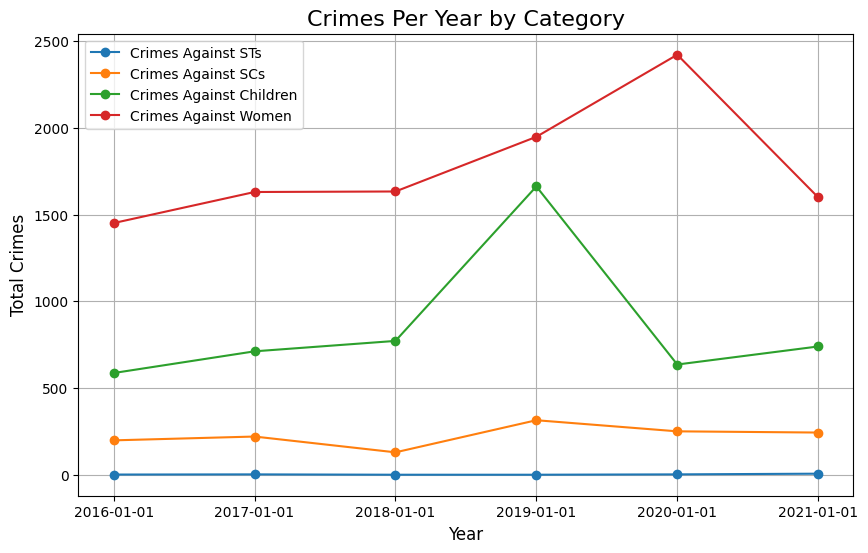

In [5]:
# Summing the crime columns per year for each dataset
df1['total_crimes'] = df1[crime_columns_sts].sum(axis=1)
df2['total_crimes'] = df2[crime_columns_scs].sum(axis=1)
df3['total_crimes'] = df3[crime_columns_children].sum(axis=1)
df4['total_crimes'] = df4[crime_columns_women].sum(axis=1)

# Grouping by year to get total crimes per year
crimes_per_year_sts = df1.groupby('year')['total_crimes'].sum()
crimes_per_year_scs = df2.groupby('year')['total_crimes'].sum()
crimes_per_year_children = df3.groupby('year')['total_crimes'].sum()
crimes_per_year_women = df4.groupby('year')['total_crimes'].sum()

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(crimes_per_year_sts.index, crimes_per_year_sts.values, label='Crimes Against STs', marker='o')
plt.plot(crimes_per_year_scs.index, crimes_per_year_scs.values, label='Crimes Against SCs', marker='o')
plt.plot(crimes_per_year_children.index, crimes_per_year_children.values, label='Crimes Against Children', marker='o')
plt.plot(crimes_per_year_women.index, crimes_per_year_women.values, label='Crimes Against Women', marker='o')

# Adding labels and title
plt.title('Crimes Per Year by Category', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Crimes', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

#### Histogram

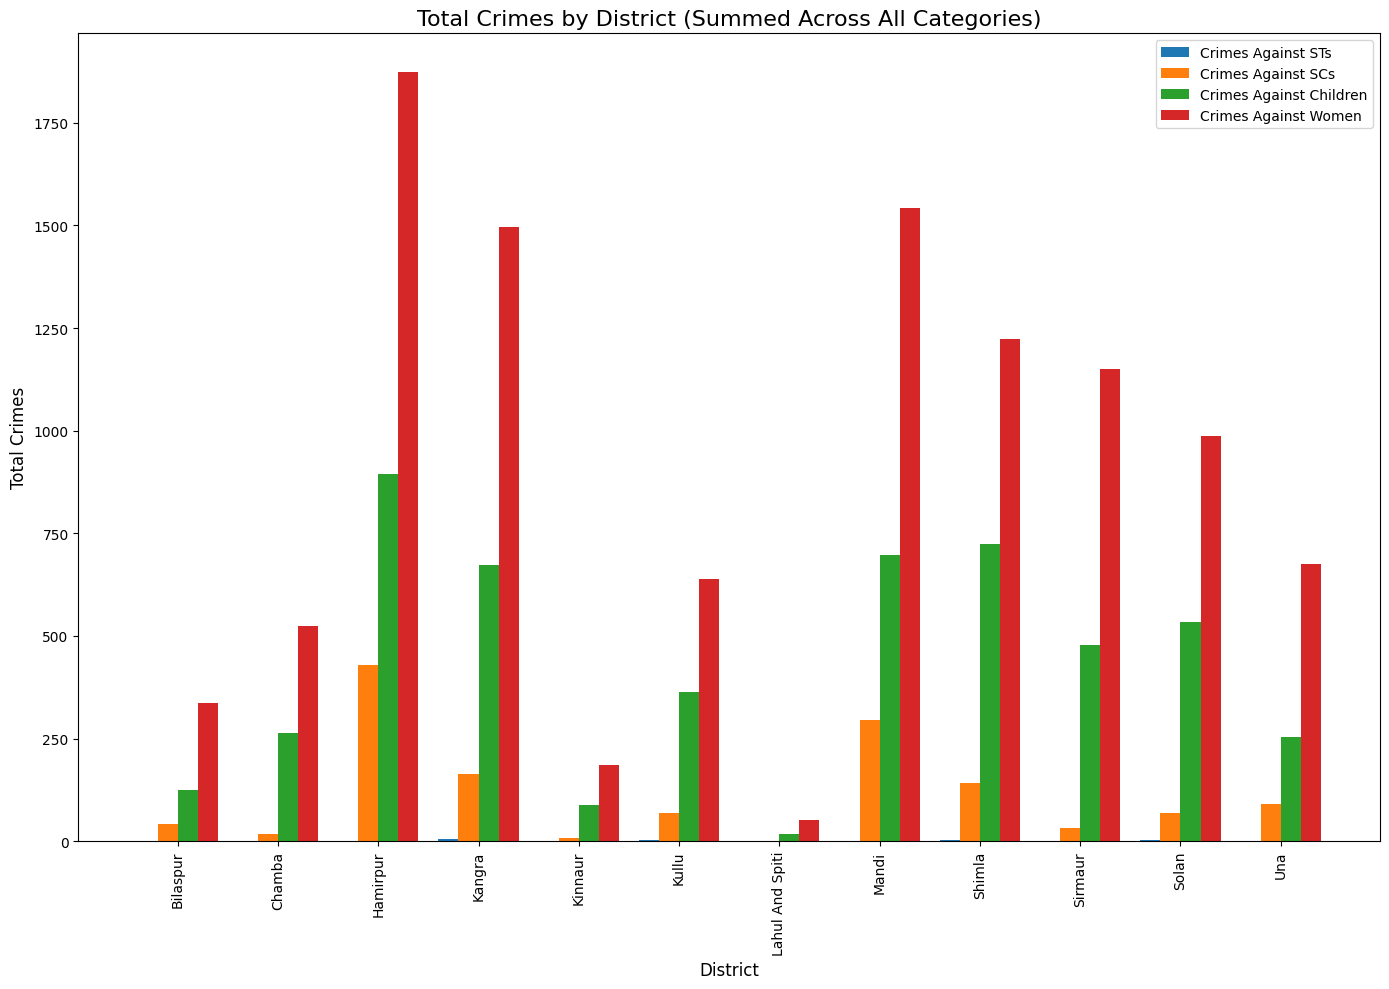

In [6]:
# Grouping by district to get total crimes per district
crimes_per_district_sts = df1.groupby('district_name')['total_crimes'].sum()
crimes_per_district_scs = df2.groupby('district_name')['total_crimes'].sum()
crimes_per_district_children = df3.groupby('district_name')['total_crimes'].sum()
crimes_per_district_women = df4.groupby('district_name')['total_crimes'].sum()

# Creating a DataFrame to facilitate plotting
df_crimes = pd.DataFrame({
    'Crimes Against STs': crimes_per_district_sts,
    'Crimes Against SCs': crimes_per_district_scs,
    'Crimes Against Children': crimes_per_district_children,
    'Crimes Against Women': crimes_per_district_women
}).fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(14, 10))

# Define the position of the bars on the x-axis
bar_width = 0.2
index = np.arange(len(df_crimes.index))

# Plot each category
for i, category in enumerate(df_crimes.columns):
    ax.bar(index + i * bar_width, df_crimes[category], bar_width, label=category)

# Adding labels and title
ax.set_title('Total Crimes by District (Summed Across All Categories)', fontsize=16)
ax.set_xlabel('District', fontsize=12)
ax.set_ylabel('Total Crimes', fontsize=12)
ax.set_xticks(index + bar_width * (len(df_crimes.columns) / 2 - 0.5))
ax.set_xticklabels(df_crimes.index, rotation=90)
ax.legend()
plt.tight_layout()
plt.show()

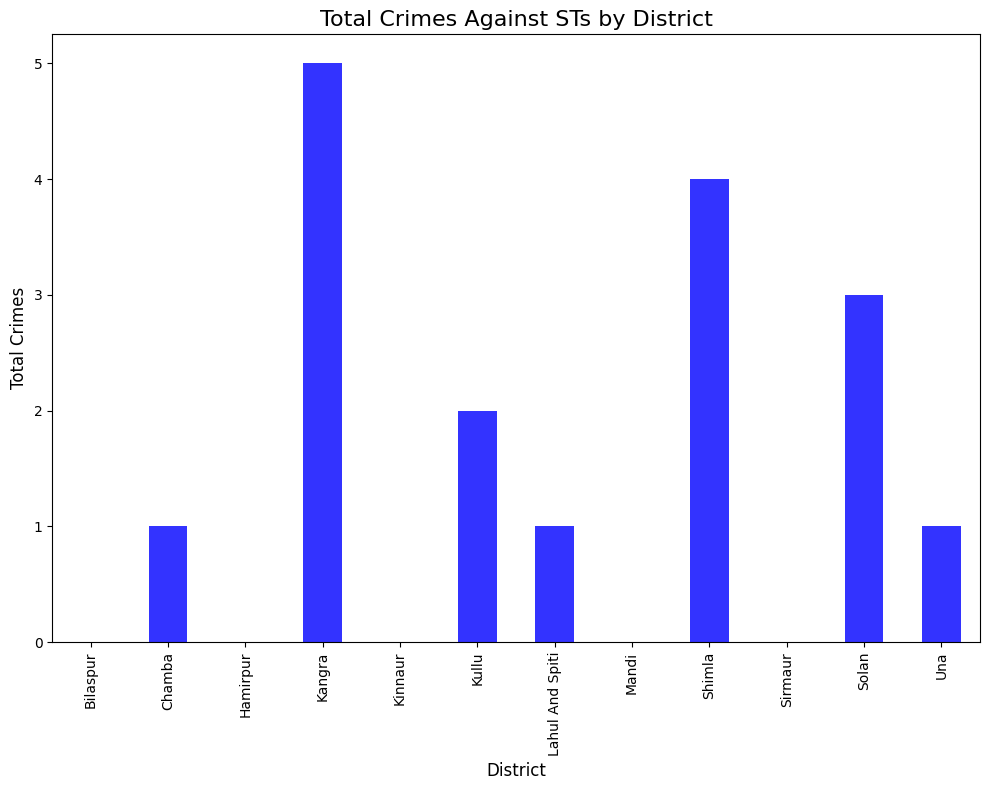

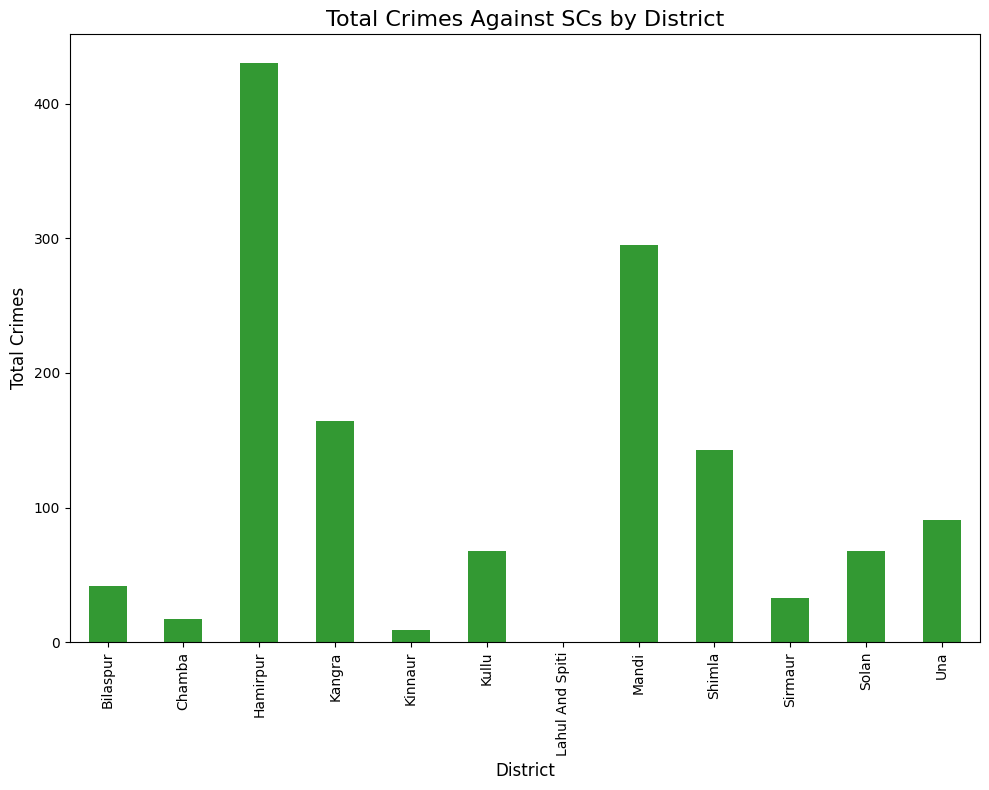

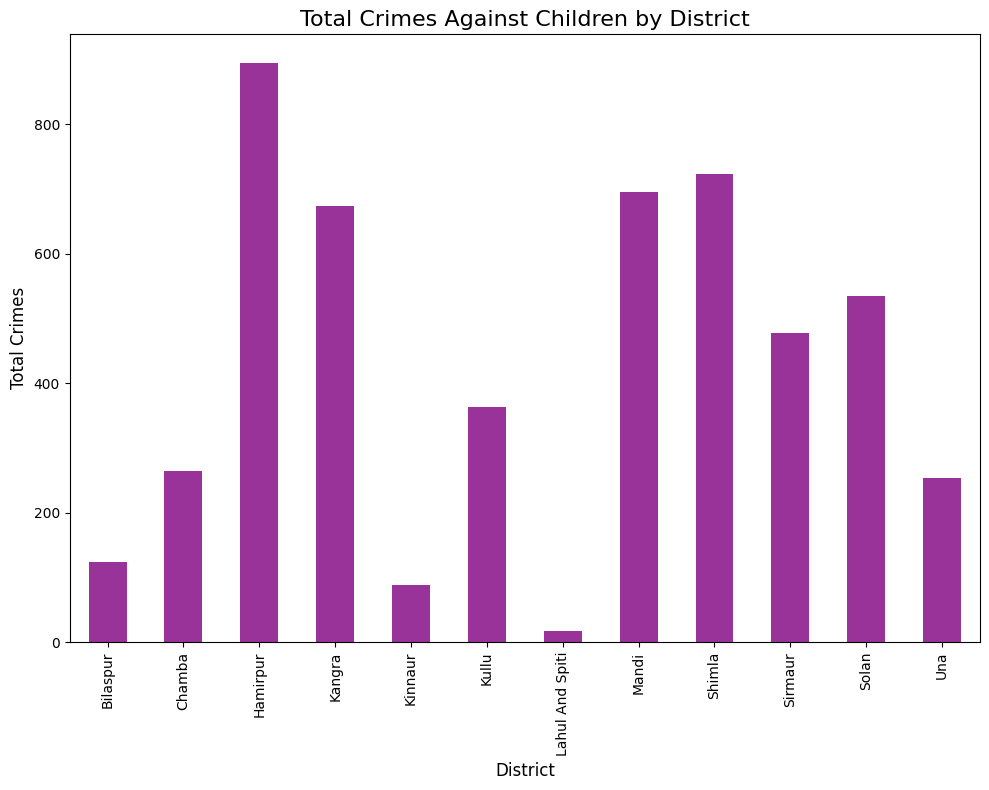

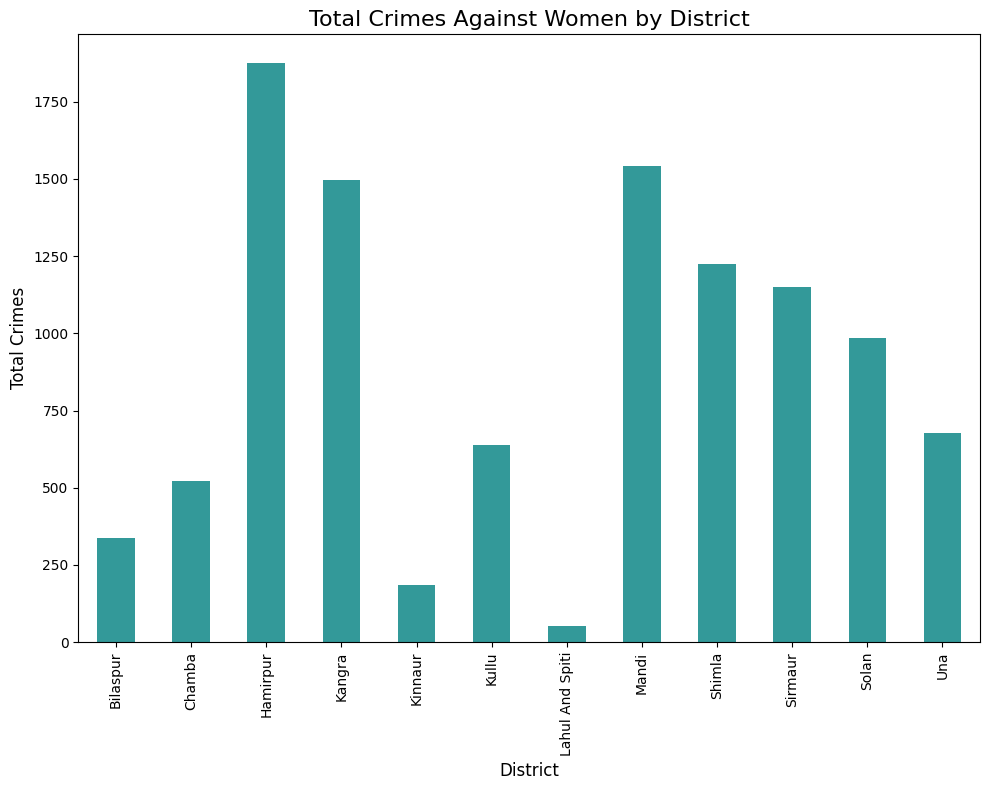

In [7]:

# Grouping by district to get total crimes per district
crimes_per_district_sts = df1.groupby('district_name')['total_crimes'].sum()
crimes_per_district_scs = df2.groupby('district_name')['total_crimes'].sum()
crimes_per_district_children = df3.groupby('district_name')['total_crimes'].sum()
crimes_per_district_women = df4.groupby('district_name')['total_crimes'].sum()

# Define a function to plot bar graphs
def plot_bar_graph(data, title, xlabel, ylabel, color):
    plt.figure(figsize=(10, 8))
    data.plot(kind='bar', color=color, alpha=0.8)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Plotting separate bar graphs for each category
plot_bar_graph(crimes_per_district_sts, 'Total Crimes Against STs by District', 'District', 'Total Crimes', 'blue')
plot_bar_graph(crimes_per_district_scs, 'Total Crimes Against SCs by District', 'District', 'Total Crimes', 'green')
plot_bar_graph(crimes_per_district_children, 'Total Crimes Against Children by District', 'District', 'Total Crimes', 'purple')
plot_bar_graph(crimes_per_district_women, 'Total Crimes Against Women by District', 'District', 'Total Crimes', 'teal')


#### Heatmap on Correlation Matrix

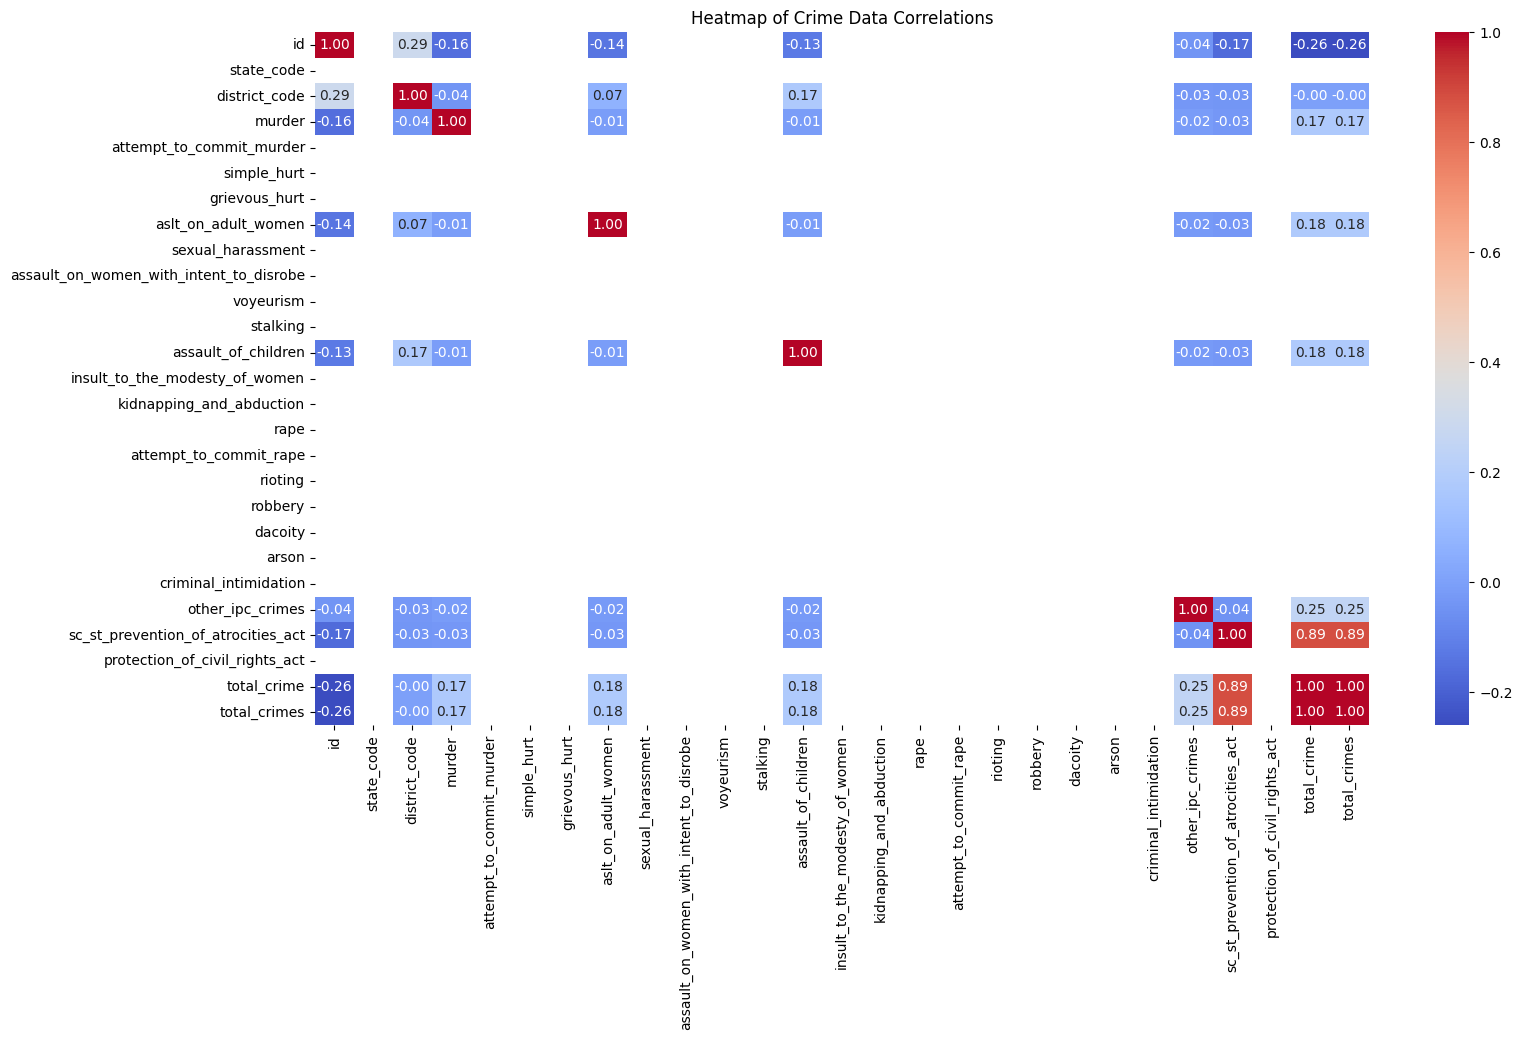

In [8]:
# Select only the numeric columns
numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns

# Create a correlation matrix
corr_matrix = df1[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(17, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Crime Data Correlations')
plt.show()

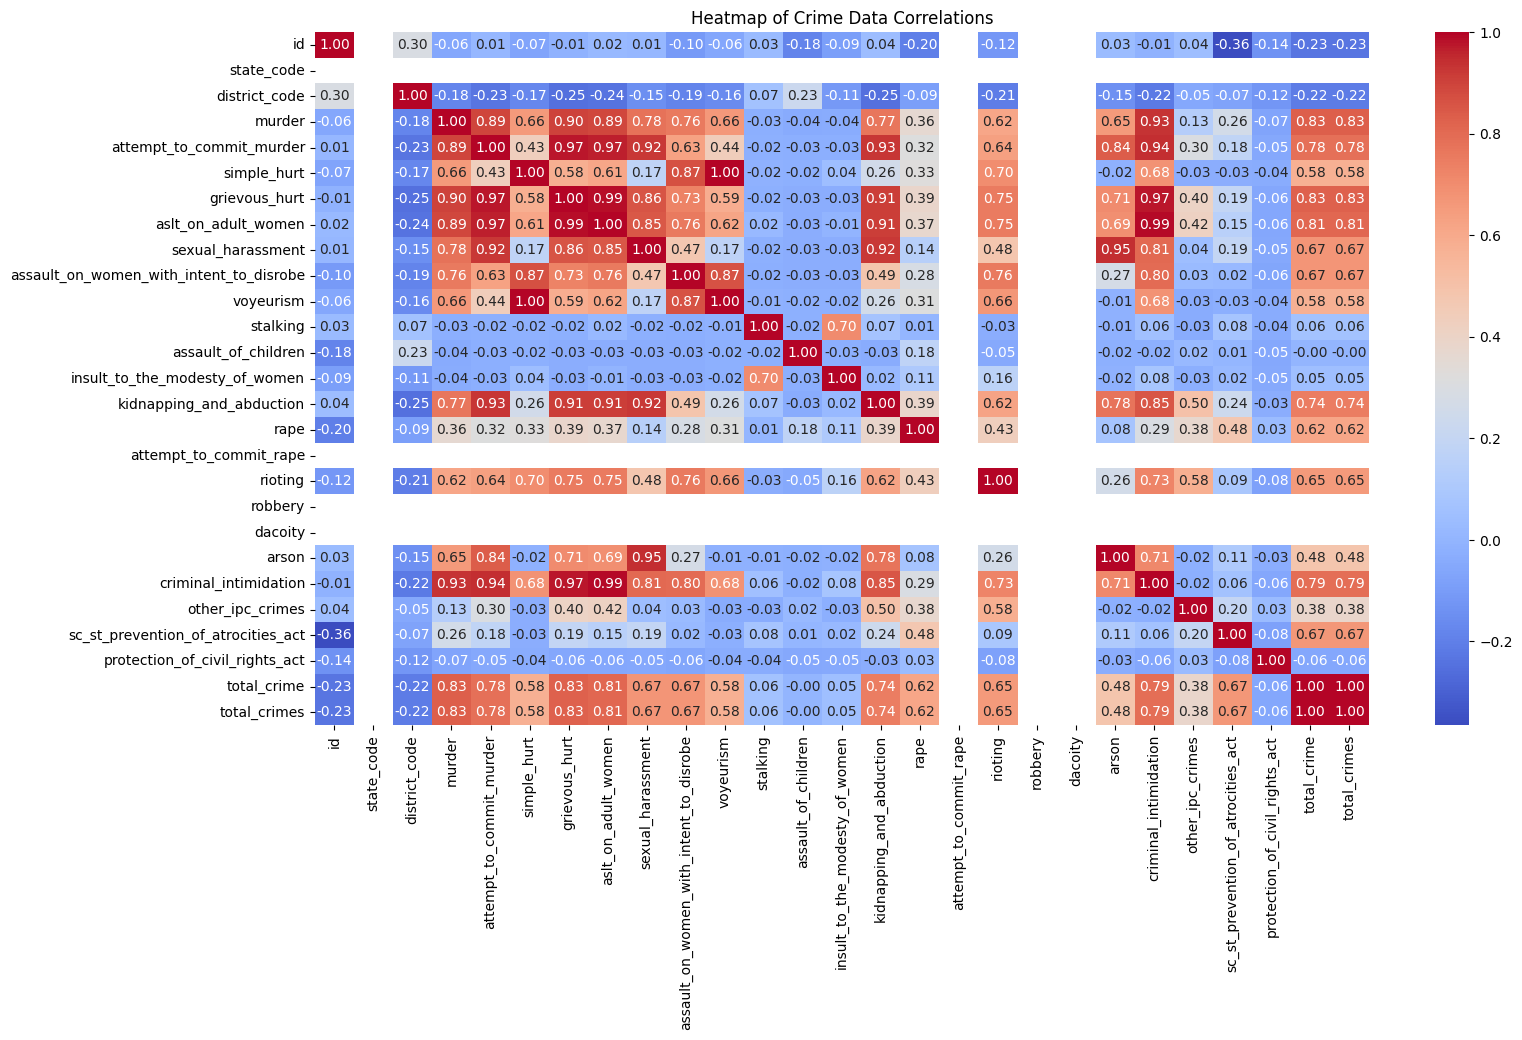

In [9]:
# Select only the numeric columns
numeric_columns = df2.select_dtypes(include=['float64', 'int64']).columns

# Create a correlation matrix
corr_matrix = df2[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(17, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Crime Data Correlations')
plt.show()

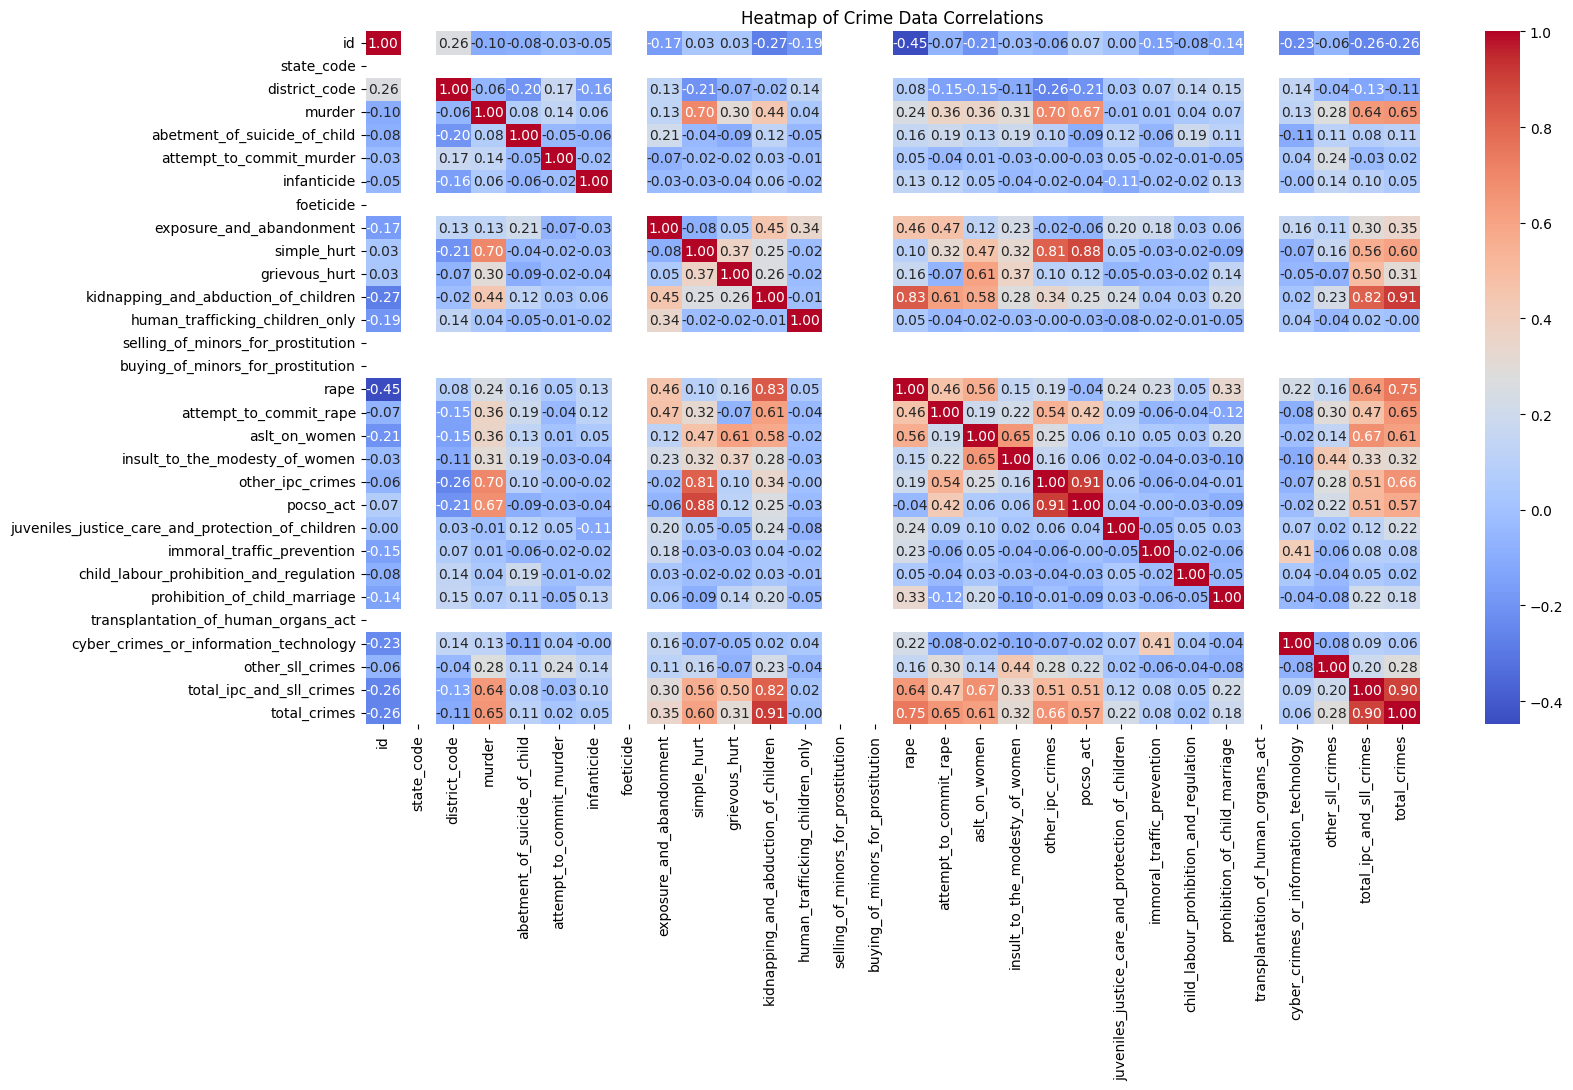

In [10]:
# Select only the numeric columns
numeric_columns = df3.select_dtypes(include=['float64', 'int64']).columns

# Create a correlation matrix
corr_matrix = df3[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(17, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Crime Data Correlations')
plt.show()

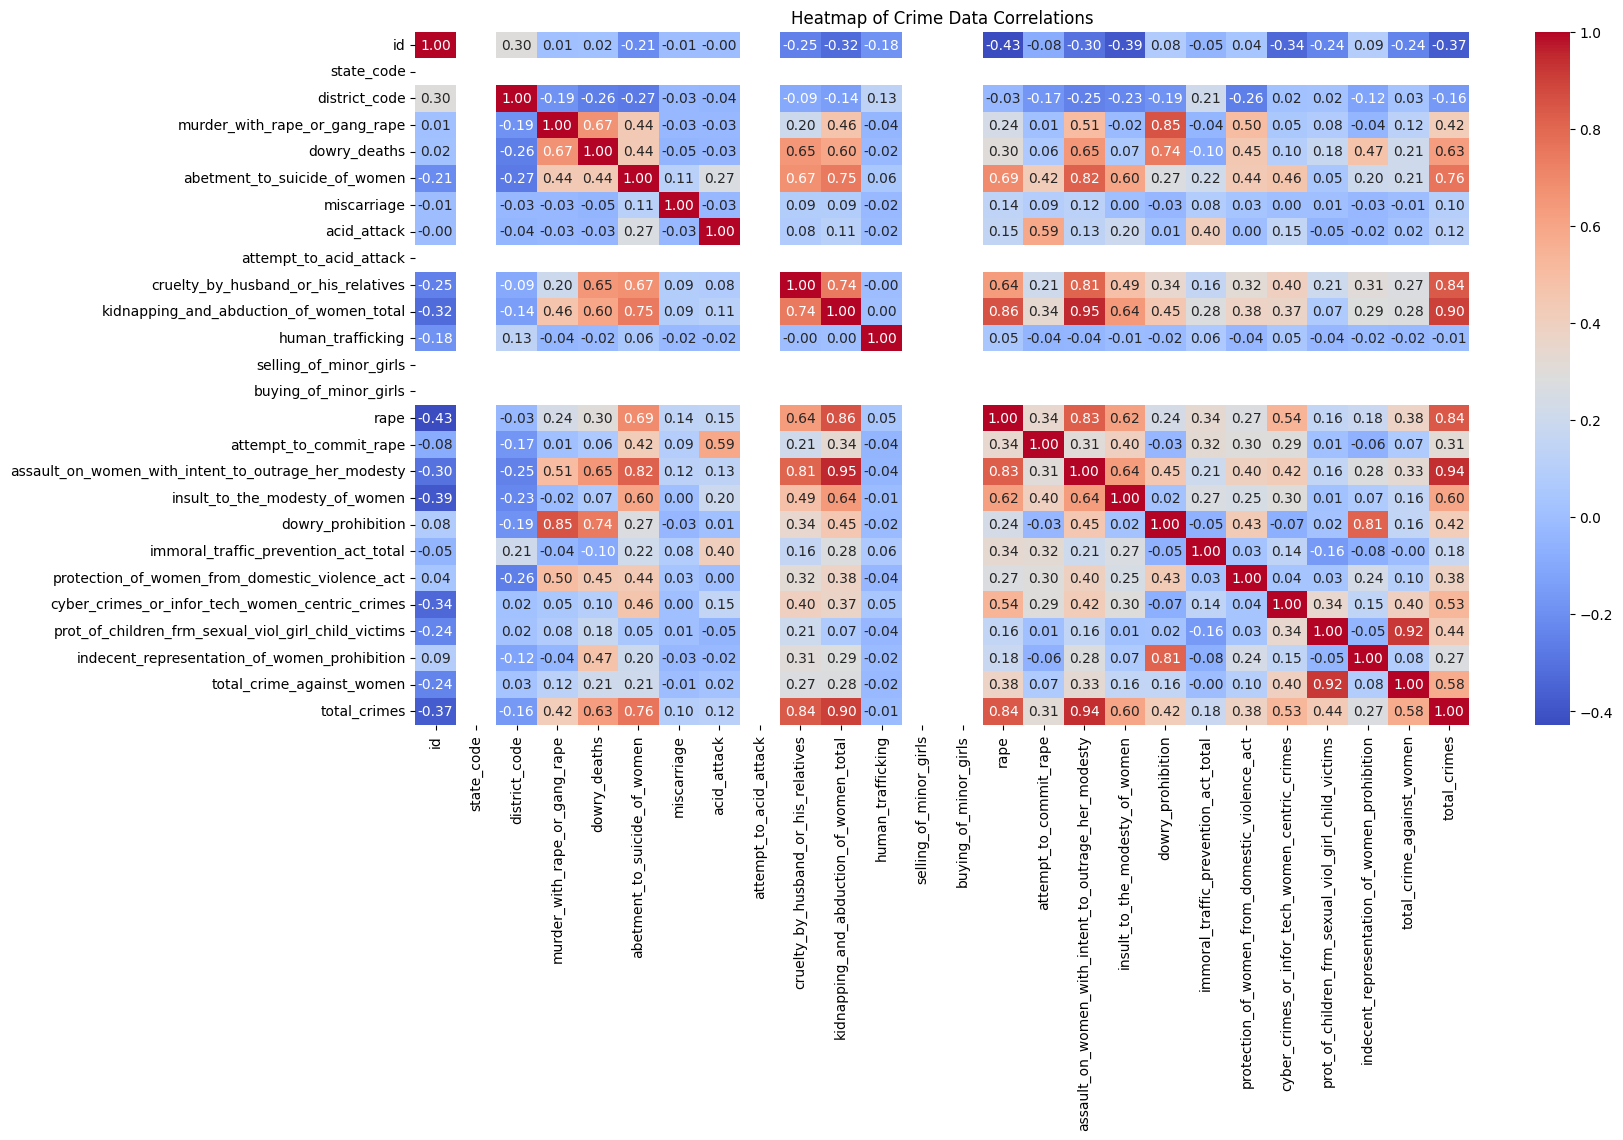

In [11]:
# Select only the numeric columns
numeric_columns = df4.select_dtypes(include=['float64', 'int64']).columns

# Create a correlation matrix
corr_matrix = df4[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(17, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Crime Data Correlations')
plt.show()

#### Pie Chart

In [12]:
# Shortened column names for better display in pie charts
shortened_labels_sts = {
    'murder': 'Murder',
    'attempt_to_commit_murder': 'Attempt Murder',
    'simple_hurt': 'S. Hurt',
    'grievous_hurt': 'G. Hurt',
    'aslt_on_adult_women': 'Assault Women',
    'sexual_harassment': 'Sex Harass.',
    'assault_on_women_with_intent_to_disrobe': 'Disrobe',
    'voyeurism': 'Voyeurism',
    'stalking': 'Stalking',
    'assault_of_children': 'Assault Kids',
    'insult_to_the_modesty_of_women': 'Insult Women',
    'kidnapping_and_abduction': 'Kidnap',
    'rape': 'Rape',
    'attempt_to_commit_rape': 'Attempt Rape',
    'rioting': 'Rioting',
    'robbery': 'Robbery',
    'dacoity': 'Dacoity',
    'arson': 'Arson',
    'criminal_intimidation': 'Intimidation',
    'other_ipc_crimes': 'Other IPC',
    'sc_st_prevention_of_atrocities_act': 'SC/ST Act',
    'protection_of_civil_rights_act': 'Civil Rights Act'
}

shortened_labels_children = {
    'murder': 'Murder',
    'abetment_of_suicide_of_child': 'Suicide Child',
    'attempt_to_commit_murder': 'Attempt Murder',
    'infanticide': 'Infanticide',
    'foeticide': 'Foeticide',
    'exposure_and_abandonment': 'Abandon',
    'simple_hurt': 'S. Hurt',
    'grievous_hurt': 'G. Hurt',
    'kidnapping_and_abduction_of_children': 'Kidnap Kids',
    'human_trafficking_children_only': 'Trafficking Kids',
    'selling_of_minors_for_prostitution': 'Sell Minors',
    'buying_of_minors_for_prostitution': 'Buy Minors',
    'rape': 'Rape',
    'attempt_to_commit_rape': 'Attempt Rape',
    'aslt_on_women': 'Assault Women',
    'insult_to_the_modesty_of_women': 'Insult Women',
    'other_ipc_crimes': 'Other IPC',
    'pocso_act': 'POCSO Act',
    'juveniles_justice_care_and_protection_of_children': 'Juvenile Act',
    'immoral_traffic_prevention': 'Traffic Prevention',
    'child_labour_prohibition_and_regulation': 'Child Labour',
    'prohibition_of_child_marriage': 'Child Marriage',
    'transplantation_of_human_organs_act': 'Organs Act',
    'cyber_crimes_or_information_technology': 'Cyber Crimes'
}

shortened_labels_women = {
    'murder_with_rape_or_gang_rape': 'Murder+Rape',
    'dowry_deaths': 'Dowry Deaths',
    'abetment_to_suicide_of_women': 'Suicide Women',
    'miscarriage': 'Miscarriage',
    'acid_attack': 'Acid Attack',
    'attempt_to_acid_attack': 'Attempt Acid',
    'cruelty_by_husband_or_his_relatives': 'Cruelty',
    'kidnapping_and_abduction_of_women_total': 'Kidnap Women',
    'human_trafficking': 'Trafficking',
    'selling_of_minor_girls': 'Sell Girls',
    'buying_of_minor_girls': 'Buy Girls',
    'rape': 'Rape',
    'attempt_to_commit_rape': 'Attempt Rape',
    'assault_on_women_with_intent_to_outrage_her_modesty': 'Assault Modesty',
    'insult_to_the_modesty_of_women': 'Insult Women',
    'dowry_prohibition': 'Dowry Prohib.',
    'immoral_traffic_prevention_act_total': 'Traffic Act',
    'protection_of_women_from_domestic_violence_act': 'Domestic Violence',
    'cyber_crimes_or_infor_tech_women_centric_crimes': 'Cyber Crimes',
    'prot_of_children_frm_sexual_viol_girl_child_victims': 'Child Sex Protection',
    'indecent_representation_of_women_prohibition': 'Indecent Rep.'
}

# Mapping of categories to shortened labels
label_mappings = {
    'STs': shortened_labels_sts,
    'SCs': shortened_labels_sts,  # Same as STs for this example
    'Children': shortened_labels_children,
    'Women': shortened_labels_women
}

# Define a function to replace column names with shorter labels
def replace_column_names(df, crime_columns, category):
    label_mapping = label_mappings[category]
    return df[crime_columns].rename(columns=label_mapping)

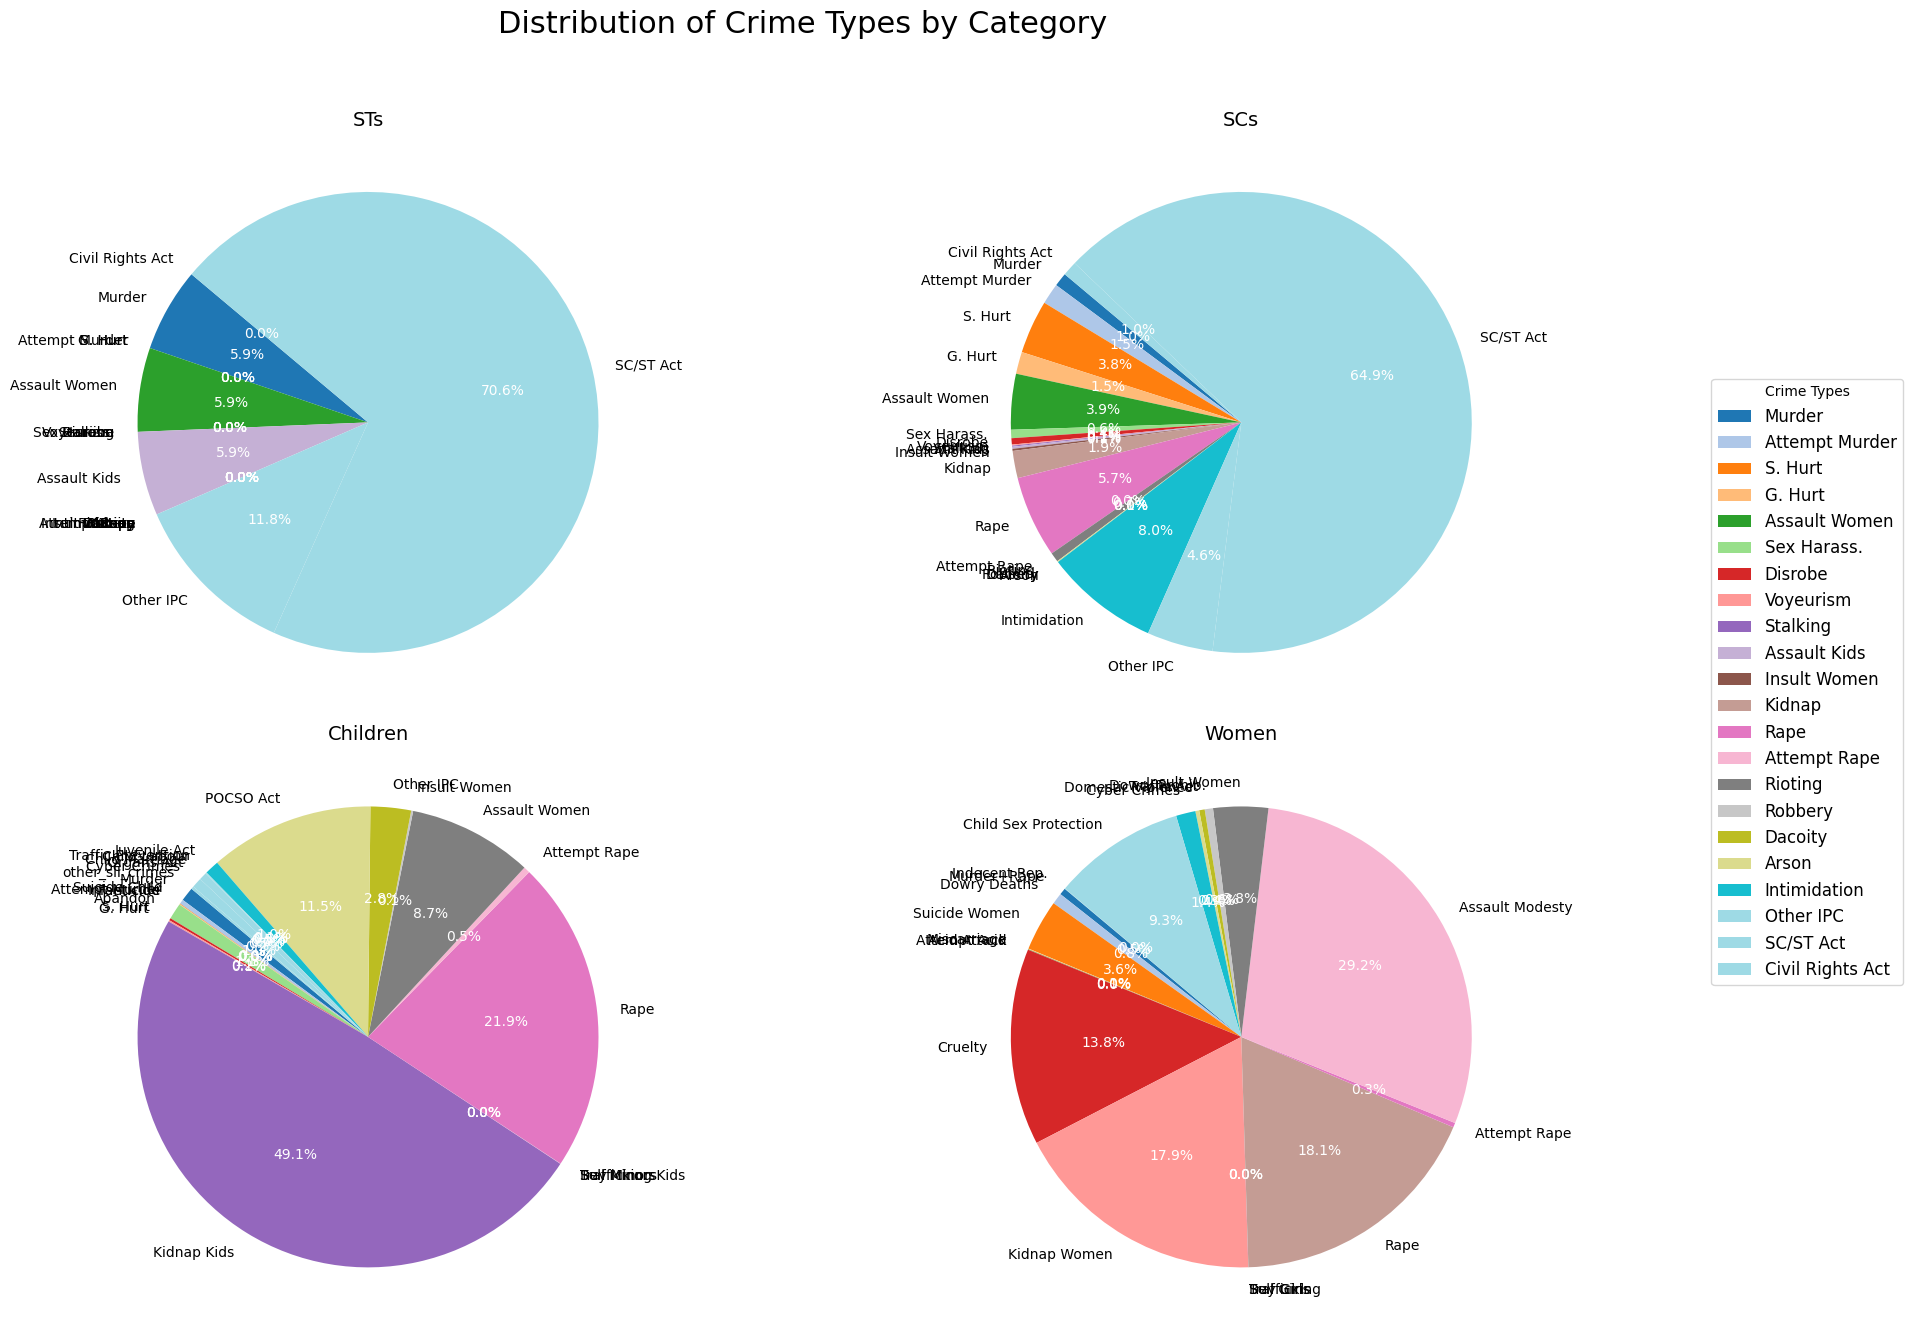

In [13]:
# Define datasets and corresponding crime columns
datasets = {
    'STs': (df1, crime_columns_sts),
    'SCs': (df2, crime_columns_scs),
    'Children': (df3, crime_columns_children),
    'Women': (df4, crime_columns_women)
}

# Define a function to plot a pie chart
def plot_pie_chart(data, category, ax):
    # Generate vibrant colors using the 'tab20' colormap
    colors = plt.get_cmap('tab20')(range(len(data)))

    # Plot the pie chart with a separate legend
    wedges, texts, autotexts = ax.pie(
        data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=colors
    )

    # Style the text and autotexts for better readability
    for text in texts:
        text.set_fontsize(10)  # Adjust label font size
    for autotext in autotexts:
        autotext.set_color('white')  # Set percentage text color to white for contrast
        autotext.set_fontsize(10)  # Adjust percentage font size

    # Set the title of each chart
    ax.set_title(f'{category}', fontsize=14)
    return wedges

# Create a subplot for each category
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Distribution of Crime Types by Category', fontsize=22)

# Plot each dataset with updated color and layout
handles = []
labels = []
for ax, (category, (df, crime_columns)) in zip(axs.flatten(), datasets.items()):
    # Replace the column names with shortened labels
    df_short = replace_column_names(df, crime_columns, category)
    total_crimes_by_type = df_short.sum()

    # Plot pie chart and capture wedges for legend
    wedges = plot_pie_chart(total_crimes_by_type, category, ax)

    # Collect handles and labels for a common legend
    if not handles:
        handles, labels = ax.get_legend_handles_labels()

# Add a single legend for all charts
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, title="Crime Types")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Data Pre-Processing

#### Integrate and Combine all data into one file

In [14]:
# Add a source column to each DataFrame
df1['source'] = 'STs'
df2['source'] = 'SCs'
df3['source'] = 'Children'
df4['source'] = 'Women'

# Combine all DataFrames
combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Save combined DataFrame to a new CSV file
combined_df.to_csv('/content/combined_crime_data.csv', index=False)

# Print the first few rows of the combined DataFrame to verify
print(combined_df.head())

   id        year        state_name  state_code district_name  district_code  \
0   0  2021-01-01  Himachal Pradesh           2         Solan             25   
1   1  2021-01-01  Himachal Pradesh           2      Bilaspur             15   
2   2  2021-01-01  Himachal Pradesh           2        Chamba             16   
3   3  2021-01-01  Himachal Pradesh           2      Hamirpur             17   
4   4  2021-01-01  Himachal Pradesh           2        Kangra             18   

  registeration_circles  murder  attempt_to_commit_murder  simple_hurt  ...  \
0                 Baddi     0.0                       0.0          0.0  ...   
1              Bilaspur     0.0                       0.0          0.0  ...   
2                Chamba     0.0                       0.0          0.0  ...   
3              Hamirpur     0.0                       0.0          0.0  ...   
4                Kangra     0.0                       0.0          0.0  ...   

   selling_of_minor_girls  buying_of_minor_g

#### Reduce the columns

In [15]:
# Load the dataset
file_path = '/content/combined_crime_data.csv'
crime_data = pd.read_csv(file_path)

# Define crime groups with all specified categories retained
crime_columns = {
    'homicide_and_violence': [
        'murder', 'attempt_to_commit_murder', 'simple_hurt', 'grievous_hurt', 'criminal_intimidation'
    ],
    'sexual_offenses': [
        'rape', 'attempt_to_commit_rape', 'sexual_harassment', 'assault_on_women_with_intent_to_disrobe', 'voyeurism',
        'stalking', 'insult_to_the_modesty_of_women', 'assault_on_women_with_intent_to_outrage_her_modesty',
        'murder_with_rape_or_gang_rape', 'aslt_on_adult_women','aslt_on_women', 'attempt_to_acid_attack', 'acid_attack',
        'prot_of_children_frm_sexual_viol_girl_child_victims'
    ],
    'kidnapping_and_abduction': [
        'kidnapping_and_abduction', 'kidnapping_and_abduction_of_women_total', 'kidnapping_and_abduction_of_children'
    ],
    'organized_and_violent_crimes': [
        'robbery', 'dacoity', 'arson', 'human_trafficking', 'gang_related_violence', 'rioting'
    ],
    'crimes_related_to_protection_acts': [
        'dowry_prohibition', 'protection_of_civil_rights_act', 'sc_st_prevention_of_atrocities_act',
        'protection_of_women_from_domestic_violence_act', 'juveniles_justice_care_and_protection_of_children',
        'pocso_act', 'immoral_traffic_prevention','indecent_representation_of_women_prohibition',
        'immoral_traffic_prevention_act_total', 'transplantation_of_human_organs_act', 'child_labour_prohibition_and_regulation',
        'prohibition_of_child_marriage'
    ],
    'cyber_and_technology_crimes': [
        'cyber_crimes_or_information_technology', 'cyber_crimes_or_infor_tech_women_centric_crimes',
        'other_ipc_crimes', 'other_sll_crimes'
    ],
    'other_crimes': [
        'dowry_deaths', 'abetment_of_suicide_of_child', 'abetment_to_suicide_of_women', 'foeticide',
        'infanticide', 'miscarriage', 'exposure_and_abandonment', 'cruelty_by_husband_or_his_relatives'
    ]
}

# Create new columns by summing the numeric crime types
for group_name, cols in crime_columns.items():
    existing_cols = [col for col in cols if col in crime_data.columns]

    if existing_cols:
        crime_data[group_name] = crime_data[existing_cols].apply(pd.to_numeric, errors='coerce').sum(axis=1)

# Drop the individual columns after grouping
columns_to_drop = [col for cols in crime_columns.values() for col in cols if col in crime_data.columns]
crime_data_reduced = crime_data.drop(columns=columns_to_drop)

# Remove 'total_crime' and retain 'total_crimes' as target
if 'total_crime' in crime_data_reduced.columns:
    crime_data_reduced = crime_data_reduced.drop(columns=['total_crime'])

# Save the updated dataset
output_file = 'combined_crime_data_summed_cleaned.csv'
crime_data_reduced.to_csv(output_file, index=False)

print(f"File saved as {output_file}")
print("Combined and Unique Columns:", list(crime_data_reduced.columns))


File saved as combined_crime_data_summed_cleaned.csv
Combined and Unique Columns: ['id', 'year', 'state_name', 'state_code', 'district_name', 'district_code', 'registeration_circles', 'assault_of_children', 'total_crimes', 'source', 'human_trafficking_children_only', 'selling_of_minors_for_prostitution', 'buying_of_minors_for_prostitution', 'total_ipc_and_sll_crimes', 'selling_of_minor_girls', 'buying_of_minor_girls', 'total_crime_against_women', 'homicide_and_violence', 'sexual_offenses', 'organized_and_violent_crimes', 'crimes_related_to_protection_acts', 'cyber_and_technology_crimes', 'other_crimes']


Selecting Crime Columns

In [16]:
## Define columns of interest in the integrated data
crime_columns = [
    'homicide_and_violence', 'sexual_offenses', 'organized_and_violent_crimes',
    'crimes_related_to_protection_acts', 'cyber_and_technology_crimes', 'other_crimes',
    'aslt_on_adult_women', 'assault_of_children', 'total_crime', 'total_crimes', 'source',
    'human_trafficking_children_only', 'selling_of_minors_for_prostitution',
    'buying_of_minors_for_prostitution', 'aslt_on_women', 'total_ipc_and_sll_crimes',
    'selling_of_minor_girls', 'buying_of_minor_girls', 'immoral_traffic_prevention_act_total',
    'indecent_representation_of_women_prohibition', 'total_crime_against_women'
]


#### Data Cleaning

#### Filling Missing Values

In [17]:
# Load the dataset
file_path = '/content/combined_crime_data_summed_cleaned.csv'
crime_data = pd.read_csv(file_path)

# Fill missing values with 0 in integrated data
crime_data.fillna(0, inplace=True)

# Fill missing values with 0 in single files
df1.fillna(0, inplace = True)
df2.fillna(0, inplace = True)
df3.fillna(0, inplace = True)
df4.fillna(0, inplace = True)

# Save the cleaned dataset
output_file = 'cleaned_combined_crime_data.csv'
crime_data.to_csv(output_file, index=False)

print(f"Cleaned file saved as {output_file}")

Cleaned file saved as cleaned_combined_crime_data.csv


#### Outliers

Integrated Data

In [18]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    # Convert the column to numeric, forcing non-numeric values to NaN
    df[column] = pd.to_numeric(df[column], errors='coerce')

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers for each column in the crime groups
outliers_dict = {}
for col in crime_columns:
    if col in crime_data.columns:  # Ensure the column exists in the dataset
        outliers_dict[col] = detect_outliers_iqr(crime_data, col)

# Print outlier information
for col, outliers in outliers_dict.items():
    print(f"Outliers detected in '{col}': {len(outliers)} outliers")

Outliers detected in 'homicide_and_violence': 45 outliers
Outliers detected in 'sexual_offenses': 45 outliers
Outliers detected in 'organized_and_violent_crimes': 8 outliers
Outliers detected in 'crimes_related_to_protection_acts': 49 outliers
Outliers detected in 'cyber_and_technology_crimes': 54 outliers
Outliers detected in 'other_crimes': 70 outliers
Outliers detected in 'assault_of_children': 3 outliers
Outliers detected in 'total_crimes': 26 outliers
Outliers detected in 'source': 0 outliers
Outliers detected in 'human_trafficking_children_only': 1 outliers
Outliers detected in 'selling_of_minors_for_prostitution': 0 outliers
Outliers detected in 'buying_of_minors_for_prostitution': 0 outliers
Outliers detected in 'total_ipc_and_sll_crimes': 69 outliers
Outliers detected in 'selling_of_minor_girls': 0 outliers
Outliers detected in 'buying_of_minor_girls': 0 outliers
Outliers detected in 'total_crime_against_women': 76 outliers


Single Data

In [19]:
# Combine all crime groups into one list
crime_groups = {'Children': crime_columns_children, 'SC': crime_columns_scs, 'ST': crime_columns_sts, 'Women': crime_columns_women}

# Detect outliers for each column in the combined crime groups
outliers_dict = {}

for group, columns in crime_groups.items():
    for col in columns:
        if col in crime_data.columns:  # Ensure the column exists in the dataset
            outliers_dict[col] = detect_outliers_iqr(crime_data, col)
            print(f"Outliers detected in '{col}' ({group} group): {len(outliers_dict[col])} outliers")


Outliers detected in 'human_trafficking_children_only' (Children group): 1 outliers
Outliers detected in 'selling_of_minors_for_prostitution' (Children group): 0 outliers
Outliers detected in 'buying_of_minors_for_prostitution' (Children group): 0 outliers
Outliers detected in 'assault_of_children' (SC group): 3 outliers
Outliers detected in 'assault_of_children' (ST group): 3 outliers
Outliers detected in 'selling_of_minor_girls' (Women group): 0 outliers
Outliers detected in 'buying_of_minor_girls' (Women group): 0 outliers


 Data with Significant Outliers

In [20]:
combine_outliers= [
'murder_with_rape_or_gang_rape','dowry_deaths','attempt_to_commit_rape',
'protection_of_women_from_domestic_violence_act',
'prot_of_children_frm_sexual_viol_girl_child_victims','cyber_crimes_or_information_technology',
'pocso_act','abetment_of_suicide_of_child','other_ipc_crimes','total_crime',
'sc_st_prevention_of_atrocities_act']

 #### Box Plot

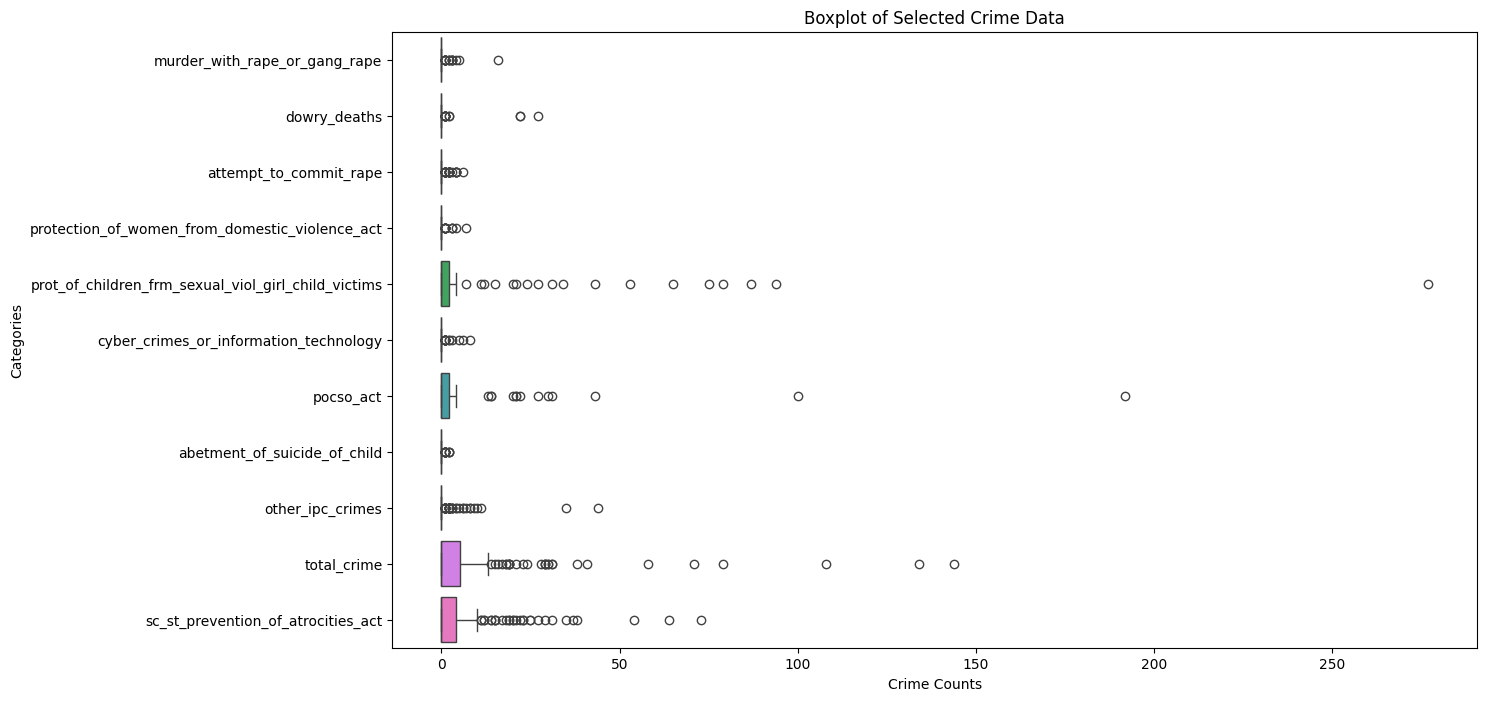

In [21]:
# Combine datasets into a single DataFrame
# You can adjust this if the datasets need to be concatenated in a specific way
df_combined = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Filter columns based on combine_outliers
df_filtered = df_combined[combine_outliers]

# Plotting boxplots
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_filtered, orient="h")
plt.title("Boxplot of Selected Crime Data")
plt.xlabel("Crime Counts")
plt.ylabel("Categories")
plt.show()

# Model Implementation

## Test Train

In [22]:
# Load the preprocessed dataset
file_path = 'combined_crime_data_summed_cleaned.csv'
crime_data = pd.read_csv(file_path)

# Define relevant features and exclude non-informative ones
selected_features = [
    'assault_of_children', 'total_ipc_and_sll_crimes', 'human_trafficking_children_only',
    'selling_of_minors_for_prostitution', 'buying_of_minors_for_prostitution',
    'selling_of_minor_girls', 'buying_of_minor_girls', 'total_crime_against_women',
    'homicide_and_violence', 'sexual_offenses', 'organized_and_violent_crimes',
    'crimes_related_to_protection_acts', 'cyber_and_technology_crimes', 'other_crimes'
]

# Separate features and target
X = crime_data[selected_features]  # Selected numeric features
y = crime_data['total_crimes']  # Target

# Ensure all columns used in the model are numeric
X = X.select_dtypes(include=[float, int])  # Select only numeric columns

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

NaN values in feature set after imputation: 0


#### Decision Tree

In [23]:
# 1. Decision Tree Regressor
print("Decision Tree Regressor")
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
evaluate_model(decision_tree, X_test, y_test)

Decision Tree Regressor
Mean Squared Error: 462.22
R^2 Score: 0.93


#### Random Forest

In [24]:
# 2. Random Forest Regressor
print("\nRandom Forest Regressor")
random_forest = RandomForestRegressor(random_state=42, n_estimators=100)
random_forest.fit(X_train, y_train)
evaluate_model(random_forest, X_test, y_test)


Random Forest Regressor
Mean Squared Error: 363.62
R^2 Score: 0.95


#### K Nearest Neighbour

In [27]:
"""# 3. K-Nearest Neighbors Regressor
def knn_model(X_train, y_train, X_test, y_test):
    print("\nK-Nearest Neighbors Regressor")
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train, y_train)
    evaluate_model(knn, X_test, y_test)"""

'# 3. K-Nearest Neighbors Regressor\ndef knn_model(X_train, y_train, X_test, y_test):\n    print("\nK-Nearest Neighbors Regressor")\n    knn = KNeighborsRegressor(n_neighbors=5)\n    knn.fit(X_train, y_train)\n    evaluate_model(knn, X_test, y_test)'

#### SVM

In [28]:
"""# 4. Support Vector Machine Regressor
print("\nSupport Vector Machine Regressor")
svm = SVR(kernel='linear')  # You can try other kernels like 'rbf'
svm.fit(X_train, y_train)
evaluate_model(svm, X_test, y_test)"""

'# 4. Support Vector Machine Regressor\nprint("\nSupport Vector Machine Regressor")\nsvm = SVR(kernel=\'linear\')  # You can try other kernels like \'rbf\'\nsvm.fit(X_train, y_train)\nevaluate_model(svm, X_test, y_test)'

# Model Evaluation